In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [0]:
df = pd.read_csv('/content/drive/My Drive/COVID-19/COVID-19_Data/Ontario_Confirmed_Cases (1).csv', index_col = 'Dates')
df = df.rename(columns={"Confirmed deaths": "Confirmed Deaths"})
df.tail(19)

,Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
04/04/2020,3630,94,2577
04/05/2020,4354,119,3012
04/06/2020,4347,150,3256
04/07/2020,4726,153,3791
04/08/2020,5276,153,4154
04/09/2020,5759,200,5162
04/10/2020,6237,222,5855
04/11/2020,6648,253,6589
04/12/2020,7049,274,7123


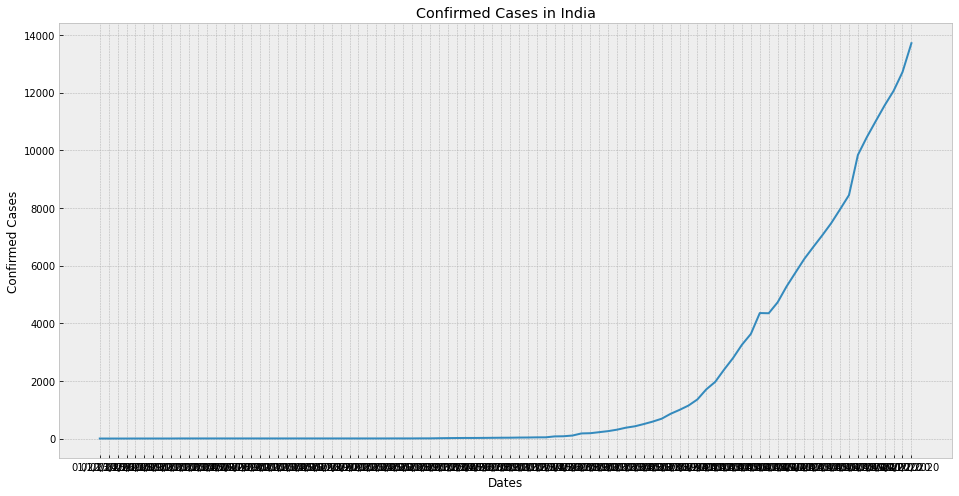

In [0]:
plt.figure(figsize=(16,8))
plt.title('Confirmed Cases in India')
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.plot(df['Confirmed Cases'])
plt.show()

In [0]:
df = df[['Confirmed Cases']]
df.head(4)

,Confirmed Cases
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0


In [0]:
future_days = 25
df['Predicted Cases'] = df[['Confirmed Cases']].shift(-future_days)
df.head(4)

,Confirmed Cases,Predicted Cases
Dates,,
01/22/2020,0,3.0
01/23/2020,0,3.0
01/24/2020,0,3.0
01/25/2020,0,3.0


In [0]:
df.tail(20)

,Confirmed Cases,Predicted Cases
Dates,,
04/03/2020,3255,NaN
04/04/2020,3630,NaN
04/05/2020,4354,NaN
04/06/2020,4347,NaN
04/07/2020,4726,NaN
04/08/2020,5276,NaN
04/09/2020,5759,NaN
04/10/2020,6237,NaN
04/11/2020,6648,NaN


In [0]:
X = np.array(df.drop(['Predicted Cases'], 1))[:-future_days]
print(X)

[[   0]
 [   0]
 [   0]
 [   0]
 [   1]
 [   1]
 [   1]
 [   1]
 [   1]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   3]
 [   4]
 [   4]
 [   4]
 [   6]
 [   6]
 [  11]
 [  15]
 [  18]
 [  20]
 [  20]
 [  22]
 [  25]
 [  28]
 [  29]
 [  34]
 [  36]
 [  41]
 [  42]
 [  74]
 [  79]
 [ 104]
 [ 177]
 [ 185]
 [ 221]
 [ 257]
 [ 308]
 [ 377]
 [ 425]
 [ 503]
 [ 588]
 [ 688]
 [ 858]
 [ 994]
 [1144]]


In [0]:
y = np.array(df['Predicted Cases'])[:-future_days]
print(y)

[3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00
 3.0000e+00 3.0000e+00 4.0000e+00 4.0000e+00 4.0000e+00 6.0000e+00
 6.0000e+00 1.1000e+01 1.5000e+01 1.8000e+01 2.0000e+01 2.0000e+01
 2.2000e+01 2.5000e+01 2.8000e+01 2.9000e+01 3.4000e+01 3.6000e+01
 4.1000e+01 4.2000e+01 7.4000e+01 7.9000e+01 1.0400e+02 1.7700e+02
 1.8500e+02 2.2100e+02 2.5700e+02 3.0800e+02 3.7700e+02 4.2500e+02
 5.0300e+02 5.8800e+02 6.8800e+02 8.5800e+02 9.9400e+02 1.1440e+03
 1.3550e+03 1.7060e+03 1.9660e+03 2.3920e+03 2.7930e+03 3.2550e+03
 3.6300e+03 4.3540e+03 4.3470e+03 4.7260e+03 5.2760e+03 5.7590e+03
 6.2370e+03 6.6480e+03 7.0490e+03 7.4700e+03 7.9530e+03 8.4470e+03
 9.8400e+03 1.0456e+04 1.1013e+04 1.1561e+04 1.2063e+04 1.2715e+04
 1.3718e+04]


In [0]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


In [0]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [0]:
x_future = df.drop(['Predicted Cases'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[  20],
       [  22],
       [  25],
       [  28],
       [  29],
       [  34],
       [  36],
       [  41],
       [  42],
       [  74],
       [  79],
       [ 104],
       [ 177],
       [ 185],
       [ 221],
       [ 257],
       [ 308],
       [ 377],
       [ 425],
       [ 503],
       [ 588],
       [ 688],
       [ 858],
       [ 994],
       [1144]])

In [0]:
tree_predictions = tree.predict(x_future)
print(tree_predictions)
print()
lr_predictions = lr.predict(x_future)
print(lr_predictions)

[ 1355.  1706.  1966.  2392.  2793.  2793.  4354.  4354.  4354.  4726.
  4726.  5759.  6237.  6648.  7049.  7470.  7470.  8447.  9840. 10456.
 11013. 11013. 12063. 12715. 13718.]

[ 1241.76639509  1270.2066422   1312.86701285  1355.52738351
  1369.74750706  1440.84812482  1469.28837192  1540.38898968
  1554.60911323  2009.65306689  2080.75368465  2436.25677344
  3474.32579272  3588.08678114  4100.011229    4611.93567686
  5337.161978    6318.35050308  7000.91643356  8110.0860706
  9318.7965725  10740.80892767 13158.22993147 15092.16673451
 17225.18526728]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


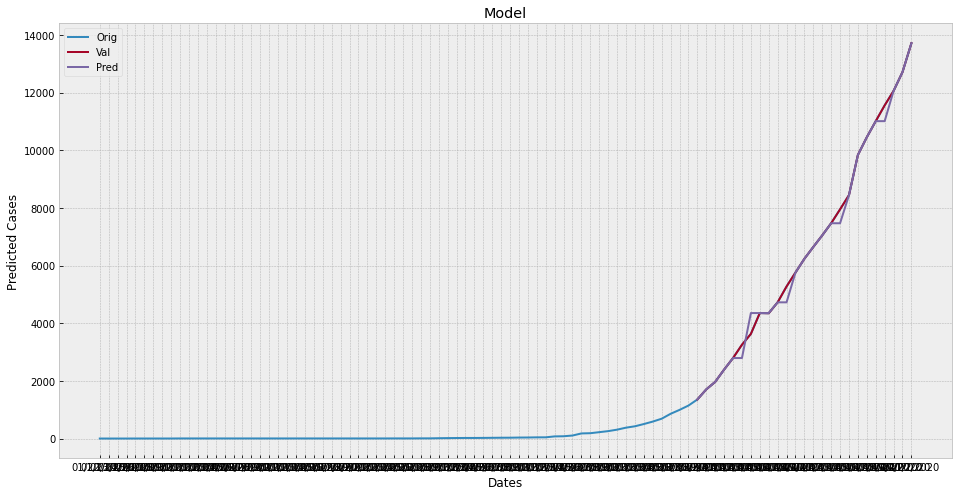

In [0]:
predictions = tree_predictions

valid = df[X.shape[0]:]
valid['Predicted Cases'] = predictions

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df['Confirmed Cases'])
plt.plot(valid['Confirmed Cases'])
plt.plot(valid['Predicted Cases'])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [0]:
valid

,Confirmed Cases,Predicted Cases
Dates,,
03/29/2020,1355,1355.0
03/30/2020,1706,1706.0
03/31/2020,1966,1966.0
04/01/2020,2392,2392.0
04/02/2020,2793,2793.0
04/03/2020,3255,2793.0
04/04/2020,3630,4354.0
04/05/2020,4354,4354.0
04/06/2020,4347,4354.0


In [0]:
from sklearn.metrics import r2_score
score = r2_score(valid['Confirmed Cases'], valid['Predicted Cases'])
print(score)

0.9952995268213232


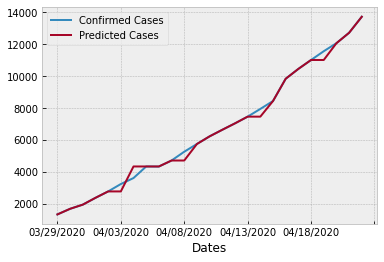

In [0]:
valid.plot()

In [0]:
df2= pd.read_csv('/content/drive/My Drive/COVID-19/COVID-19_Data/Ontario_Confirmed_Cases (1).csv', index_col = 'Dates')
df2 = df2.rename(columns={"Confirmed deaths": "Confirmed Deaths"})
df2.head(10)

,Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
01/22/2020,0,0,0
01/23/2020,0,0,0
01/24/2020,0,0,0
01/25/2020,0,0,0
01/26/2020,1,0,0
01/27/2020,1,0,0
01/28/2020,1,0,0
01/29/2020,1,0,0
01/30/2020,1,0,0


In [0]:
df2 = df2[['Confirmed Deaths']]

In [0]:
df2.head()

,Confirmed Deaths
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0
01/26/2020,0


In [0]:
future_days_deaths = 25
df2['Predicted Deaths'] = df2[['Confirmed Deaths']].shift(-future_days_deaths)
df2.tail(4)

,Confirmed Deaths,Predicted Deaths
Dates,,
04/19/2020,591,NaN
04/20/2020,624,NaN
04/21/2020,694,NaN
04/22/2020,762,NaN


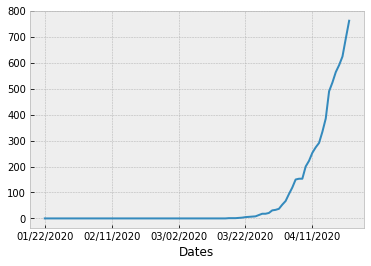

In [0]:
df2['Confirmed Deaths'].plot()

In [0]:
X1 = np.array(df2.drop(['Predicted Deaths'], 1))[:-future_days_deaths]
print(X1)

[[ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [ 1]
 [ 1]
 [ 2]
 [ 3]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [13]
 [18]
 [18]]


In [0]:
y1 = np.array(df2['Predicted Deaths'])[:-future_days_deaths]
print(y1)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   1.   1.   1.   2.   3.   5.   6.   7.   8.  13.  18.  18.
  21.  31.  33.  37.  53.  67.  94. 119. 150. 153. 153. 200. 222. 253.
 274. 291. 334. 385. 490. 524. 564. 591. 624. 694. 762.]


In [0]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X1, y1, test_size = 0.25)


In [0]:
tree2 = DecisionTreeRegressor().fit(x_train2, y_train2)
lr2 = LinearRegression().fit(x_train2, y_train2)

In [0]:
x_future2 = df2.drop(['Predicted Deaths'], 1)[:-future_days_deaths]
x_future2 = x_future2.tail(future_days_deaths)
x_future2 = np.array(x_future2)
x_future2

array([[ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 3],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [13],
       [18],
       [18]])

In [0]:
tree_predictions2 = tree2.predict(x_future2)
print(tree_predictions2)
print()
lr_predictions2 = lr2.predict(x_future2)
print(lr_predictions2)

[ 25.62790698  25.62790698  25.62790698  25.62790698  25.62790698
  25.62790698  25.62790698  25.62790698  25.62790698  25.62790698
  25.62790698  25.62790698  25.62790698 291.         291.
 291.         291.         385.         490.         524.
 564.         564.         624.         694.         694.        ]

[ 42.77094932  42.77094932  42.77094932  42.77094932  42.77094932
  42.77094932  42.77094932  42.77094932  42.77094932  42.77094932
  42.77094932  42.77094932  42.77094932  90.60967638  90.60967638
  90.60967638 138.44840343 186.28713049 281.96458461 329.80331166
 377.64203872 425.48076578 664.67440106 903.86803635 903.86803635]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


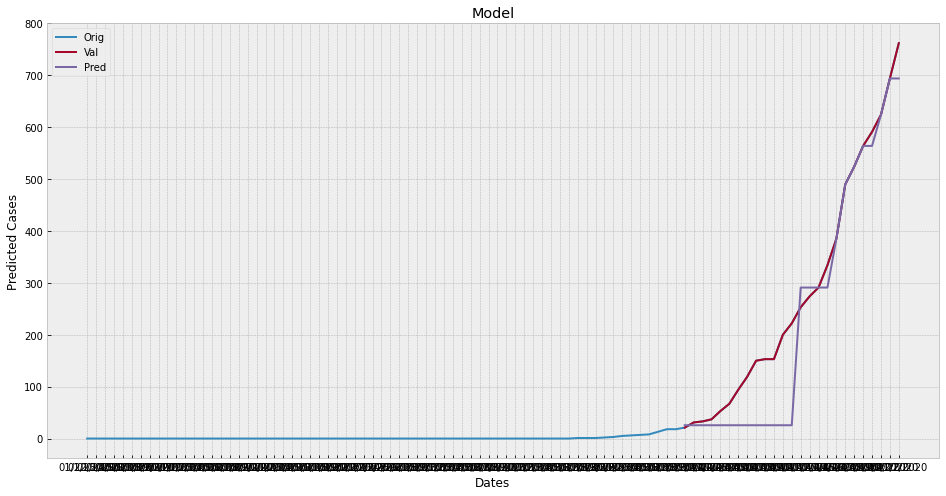

In [0]:
predictions2 = tree_predictions2

valid2 = df2[X1.shape[0]:]
valid2['Predicted Deaths'] = predictions2

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df2['Confirmed Deaths'])
plt.plot(valid2['Confirmed Deaths'])
plt.plot(valid2['Predicted Deaths'])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [0]:
from sklearn.metrics import r2_score
score2 = r2_score(valid2['Confirmed Deaths'], valid2['Predicted Deaths'])
print(score2)

0.8893782824059517


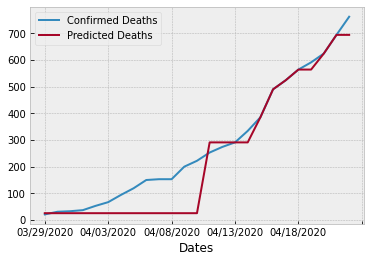

In [0]:
valid2.plot()

In [0]:
df3 = pd.read_csv("/content/drive/My Drive/COVID-19/COVID-19_Data/Ontario_Confirmed_Cases (1).csv", index_col = 'Dates')
df3 = df3.rename(columns={"Confirmed deaths": "Confirmed Deaths"})
df3.head(5)

,Confirmed Cases,Confirmed Deaths,Confirmed Recovered
Dates,,,
01/22/2020,0,0,0
01/23/2020,0,0,0
01/24/2020,0,0,0
01/25/2020,0,0,0
01/26/2020,1,0,0


In [0]:
df3 = df3[['Confirmed Recovered']]

In [0]:
df3.head()

,Confirmed Recovered
Dates,
01/22/2020,0
01/23/2020,0
01/24/2020,0
01/25/2020,0
01/26/2020,0


In [0]:
future_days_recover = 25

In [0]:
df3['Predicted Recovered'] = df3[['Confirmed Recovered']].shift(-future_days_recover)
df3.tail(4)

,Confirmed Recovered,Predicted Recovered
Dates,,
04/19/2020,11847,NaN
04/20/2020,12543,NaN
04/21/2020,13188,NaN
04/22/2020,14454,NaN


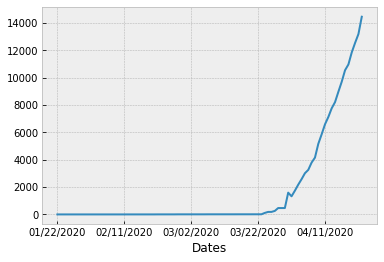

In [0]:
df3['Confirmed Recovered'].plot()

In [0]:
X2 = np.array(df3.drop(['Predicted Recovered'], 1))[:-future_days_recover]
print(X2)

[[  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  0]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  1]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  3]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  6]
 [  8]
 [  8]
 [  8]
 [  8]
 [  8]
 [  8]
 [  8]
 [  8]
 [  8]
 [  9]
 [  9]
 [  9]
 [  9]
 [  9]
 [ 10]
 [ 10]
 [ 10]
 [110]
 [183]
 [184]
 [256]
 [466]]


In [0]:
y2 = np.array(df3['Predicted Recovered'])[:-future_days_recover]
print(y2)

[1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 3.0000e+00
 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 3.0000e+00 6.0000e+00
 6.0000e+00 6.0000e+00 6.0000e+00 6.0000e+00 6.0000e+00 6.0000e+00
 6.0000e+00 6.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00
 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00 8.0000e+00 9.0000e+00
 9.0000e+00 9.0000e+00 9.0000e+00 9.0000e+00 1.0000e+01 1.0000e+01
 1.0000e+01 1.1000e+02 1.8300e+02 1.8400e+02 2.5600e+02 4.6600e+02
 4.6600e+02 4.6600e+02 1.5920e+03 1.3240e+03 1.7350e+03 2.1750e+03
 2.5770e+03 3.0120e+03 3.2560e+03 3.7910e+03 4.1540e+03 5.1620e+03
 5.8550e+03 6.5890e+03 7.1230e+03 7.7580e+03 8.2100e+03 8.9660e+03
 9.6980e+03 1.0545e+04 1.0964e+04 1.1847e+04 1.2543e+04 1.3188e+04
 1.4454e+04]


In [0]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = 0.25)


In [0]:
tree3 = DecisionTreeRegressor().fit(x_train3, y_train3)
lr3 = LinearRegression().fit(x_train3, y_train3)

In [0]:
x_future3 = df3.drop(['Predicted Recovered'], 1)[:-future_days_recover]
x_future3 = x_future3.tail(future_days_recover)
x_future3 = np.array(x_future3)
x_future3

array([[  6],
       [  6],
       [  6],
       [  8],
       [  8],
       [  8],
       [  8],
       [  8],
       [  8],
       [  8],
       [  8],
       [  8],
       [  9],
       [  9],
       [  9],
       [  9],
       [  9],
       [ 10],
       [ 10],
       [ 10],
       [110],
       [183],
       [184],
       [256],
       [466]])

In [0]:
tree_predictions3 = tree3.predict(x_future3)
print(tree_predictions3)
print()
lr_predictions3 = lr3.predict(x_future3)
print(lr_predictions3)

[  400.14285714   400.14285714   400.14285714  3094.28571429
  3094.28571429  3094.28571429  3094.28571429  3094.28571429
  3094.28571429  3094.28571429  3094.28571429  3094.28571429
  7103.          7103.          7103.          7103.
  7103.          9698.          9698.          9698.
 10964.         11847.         12543.         12543.
 14454.        ]

[ 1633.77651084  1633.77651084  1633.77651084  1710.40800018
  1710.40800018  1710.40800018  1710.40800018  1710.40800018
  1710.40800018  1710.40800018  1710.40800018  1710.40800018
  1748.72374484  1748.72374484  1748.72374484  1748.72374484
  1748.72374484  1787.03948951  1787.03948951  1787.03948951
  5618.61395635  8415.66331715  8453.97906181 11212.71267794
 19259.0190583 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


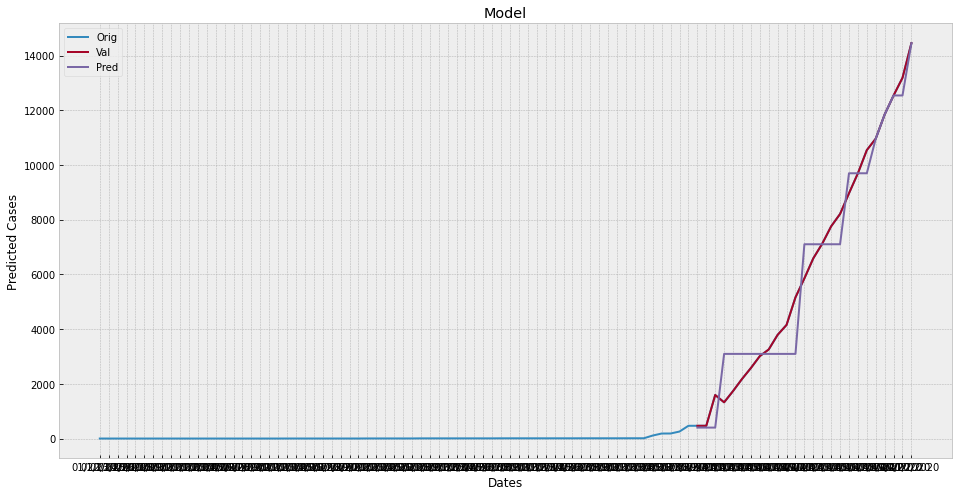

In [0]:
predictions3 = tree_predictions3

valid3 = df3[X2.shape[0]:]
valid3['Predicted Recovered'] = predictions3

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Dates')
plt.ylabel('Predicted Cases')
plt.plot(df3['Confirmed Recovered'])
plt.plot(valid3['Confirmed Recovered'])
plt.plot(valid3['Predicted Recovered'])
plt.legend(['Orig', 'Val', 'Pred'])
plt.show()


In [0]:
valid3

,Confirmed Recovered,Predicted Recovered
Dates,,
03/29/2020,466,400.142857
03/30/2020,466,400.142857
03/31/2020,1592,400.142857
04/01/2020,1324,3094.285714
04/02/2020,1735,3094.285714
04/03/2020,2175,3094.285714
04/04/2020,2577,3094.285714
04/05/2020,3012,3094.285714
04/06/2020,3256,3094.285714


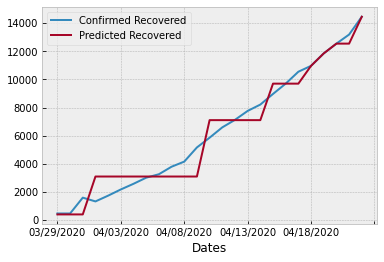

In [0]:
valid3.plot()

In [0]:
valid_final = valid.join(valid2.join(valid3))
valid_final

,Confirmed Cases,Predicted Cases,Confirmed Deaths,Predicted Deaths,Confirmed Recovered,Predicted Recovered
Dates,,,,,,
03/29/2020,1355,1355.0,21,25.627907,466,400.142857
03/30/2020,1706,1706.0,31,25.627907,466,400.142857
03/31/2020,1966,1966.0,33,25.627907,1592,400.142857
04/01/2020,2392,2392.0,37,25.627907,1324,3094.285714
04/02/2020,2793,2793.0,53,25.627907,1735,3094.285714
04/03/2020,3255,2793.0,67,25.627907,2175,3094.285714
04/04/2020,3630,4354.0,94,25.627907,2577,3094.285714
04/05/2020,4354,4354.0,119,25.627907,3012,3094.285714
04/06/2020,4347,4354.0,150,25.627907,3256,3094.285714


In [0]:
from sklearn.metrics import r2_score
score3 = r2_score(valid3['Confirmed Recovered'], valid3['Predicted Recovered'])
print(score3)

0.958496711368107


In [0]:
average = (score + score2 + score3) / 3
average

0.9477248401984606